In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Reading data

In [3]:
df = pd.read_csv('house_price_data.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [7]:
## Target feature
y = df['SalePrice']
y.shape

(1460,)

#### Dropping target feature and nonessential feature

In [8]:
df.drop(['SalePrice', 'Id'], axis=1,inplace=True)

#### Checking columns with null values

In [9]:
df_null = []
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
        df_null.append(col)
        print('%s: %d' % (col,df[col].isnull().sum()))

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [10]:
df2 = df[df_null]
df2.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

#### Dropping columns with object type having null values

In [11]:
cols_to_drop = []
cols_na = []
for col in df2.columns:
    if df[col].dtype == 'O':
        cols_to_drop.append(col)
    else:
        cols_na.append(col)

In [12]:
df.drop(columns = cols_to_drop, axis=1, inplace=True)
df.shape

(1460, 63)

In [13]:
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
#         df_null.append(col)
        print('%s: %d' % (col,df[col].isnull().sum()))

LotFrontage: 259
MasVnrArea: 8
GarageYrBlt: 81


In [14]:
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
        print('Before replacing missing values:')
        print(df[col].iloc[40:45])
#         df = df.fillna(df.median())
#         print('\nAfter replacing missing values:')
#         print(df[col].iloc[40:45])

Before replacing missing values:
40     84.0
41    115.0
42      NaN
43      NaN
44     70.0
Name: LotFrontage, dtype: float64
Before replacing missing values:
40    101.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: MasVnrArea, dtype: float64
Before replacing missing values:
40    1965.0
41    1959.0
42    1983.0
43    1977.0
44    1959.0
Name: GarageYrBlt, dtype: float64


#### Replacing null columns with median values

In [15]:
df = df.fillna(df.median())
for col in cols_na:
    print('\nAfter replacing missing values:')
    print(df[col].iloc[40:45])


After replacing missing values:
40     84.0
41    115.0
42     69.0
43     69.0
44     70.0
Name: LotFrontage, dtype: float64

After replacing missing values:
40    101.0
41      0.0
42      0.0
43      0.0
44      0.0
Name: MasVnrArea, dtype: float64

After replacing missing values:
40    1965.0
41    1959.0
42    1983.0
43    1977.0
44    1959.0
Name: GarageYrBlt, dtype: float64


In [16]:
df.shape

(1460, 63)

In [17]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
                  ...   
CentralAir        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64


### Converting strings to categorical values using Label Encoder

In [18]:
print(df['SaleType'].unique())

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [19]:
for i in range(df.shape[1]):
    if df.iloc[:,i].dtypes == object:
        le = preprocessing.LabelEncoder()
        le.fit(list(df.iloc[:,i].values))
        df.iloc[:,i] = le.transform(list(df.iloc[:,i].values))

print(df['SaleType'].unique())

[8 6 0 3 4 1 5 2 7]


### Normality check for the target

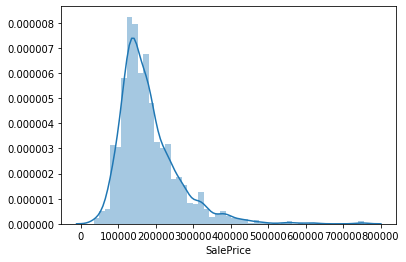

In [20]:
ax = sns.distplot(y)
plt.show()

### log-transform to make normally distributed

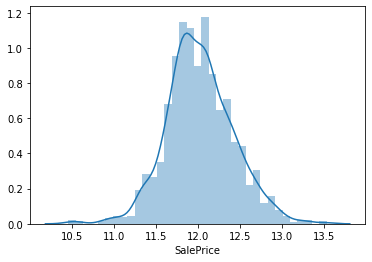

In [21]:
y = np.log(y)

ax = sns.distplot(y)
plt.show()

In [22]:
y[0:10]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
5    11.870600
6    12.634603
7    12.206073
8    11.774520
9    11.678440
Name: SalePrice, dtype: float64

### Random Forest for feature extraction

Training done using Random Forest


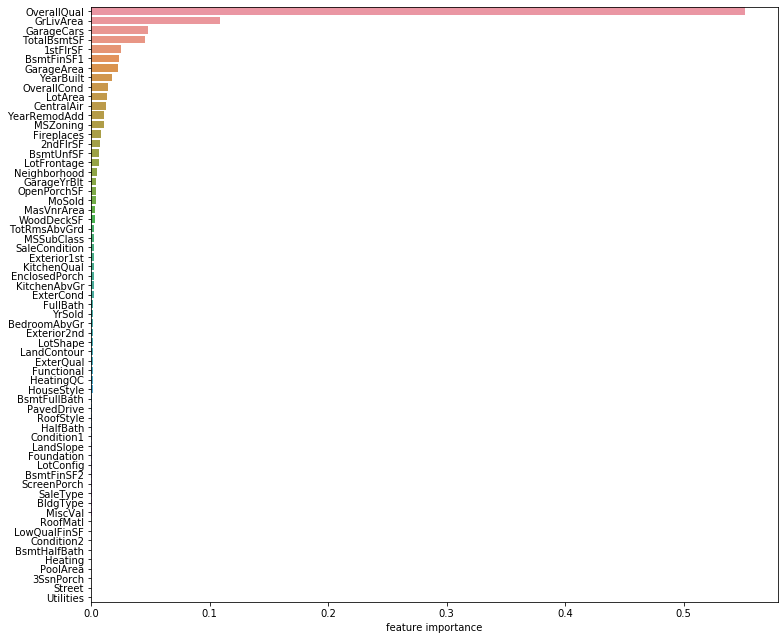

In [23]:
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(df, y)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=df.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()


#### Selecting top 30 features 

In [24]:
X = df.iloc[:,ranking[:30]]

In [25]:
X.shape

(1460, 30)

In [26]:
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,GarageArea,YearBuilt,OverallCond,LotArea,...,MoSold,MasVnrArea,WoodDeckSF,TotRmsAbvGrd,MSSubClass,SaleCondition,Exterior1st,KitchenQual,EnclosedPorch,KitchenAbvGr
0,7,1710,2,856,856,706,548,2003,5,8450,...,2,196.0,0,8,60,4,12,2,0,1
1,6,1262,2,1262,1262,978,460,1976,8,9600,...,5,0.0,298,6,20,4,8,3,0,1
2,7,1786,2,920,920,486,608,2001,5,11250,...,9,162.0,0,6,60,4,12,2,0,1
3,7,1717,3,756,961,216,642,1915,5,9550,...,2,0.0,0,7,70,0,13,2,272,1
4,8,2198,3,1145,1145,655,836,2000,5,14260,...,12,350.0,192,9,60,4,12,2,0,1


### Normalizing numerical features using zscoring

In [27]:
X = (X - X.mean())/X.std()
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,GarageArea,YearBuilt,OverallCond,LotArea,...,MoSold,MasVnrArea,WoodDeckSF,TotRmsAbvGrd,MSSubClass,SaleCondition,Exterior1st,KitchenQual,EnclosedPorch,KitchenAbvGr
0,0.651256,0.370207,0.311618,-0.459145,-0.793162,0.575228,0.350880,1.050634,-0.517023,-0.207071,...,-1.598563,0.513928,-0.751918,0.911897,0.073350,0.208431,0.742838,-0.409229,-0.359202,-0.211381
1,-0.071812,-0.482347,0.311618,0.466305,0.257052,1.171591,-0.060710,0.156680,2.178881,-0.091855,...,-0.488943,-0.570555,1.625638,-0.318574,-0.872264,0.208431,-0.508077,0.795356,-0.359202,-0.211381
2,0.651256,0.514836,0.311618,-0.313261,-0.627611,0.092875,0.631510,0.984415,-0.517023,0.073455,...,0.990552,0.325803,-0.751918,-0.318574,0.073350,0.208431,0.742838,-0.409229,-0.359202,-0.211381
3,0.651256,0.383528,1.649742,-0.687089,-0.521555,-0.499103,0.790533,-1.862993,-0.517023,-0.096864,...,-1.598563,-0.570555,-0.751918,0.296662,0.309753,-3.425110,1.055567,-0.409229,4.091122,-0.211381
4,1.374324,1.298881,1.649742,0.199611,-0.045596,0.463410,1.697903,0.951306,-0.517023,0.375020,...,2.100173,1.366021,0.779930,1.527133,0.073350,0.208431,0.742838,-0.409229,-0.359202,-0.211381


### Outlier Detection

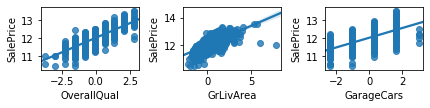

In [28]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(3):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X.iloc[:,i], y=y)

plt.tight_layout()
plt.show()


#### Removing few outliers

In [29]:
Xout = X
Xout['SalePrice'] = y
Xout = Xout.drop(Xout[(Xout['TotalBsmtSF']>5) & (Xout['SalePrice']<12.5)].index)
Xout = Xout.drop(Xout[(Xout['GrLivArea']>5) & (Xout['SalePrice']<13)].index)
Xout.shape

(1458, 31)

In [30]:
y = Xout['SalePrice']
X = Xout.drop(['SalePrice'], axis=1)

### Splitting the data into train and test with 70:30 ratio

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [32]:
X_train.shape

(1020, 30)

In [33]:
X_test.shape

(438, 30)

In [34]:
y_train.shape

(1020,)

In [35]:
y_test.shape

(438,)

In [38]:
X_train.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,GarageArea,YearBuilt,OverallCond,LotArea,...,MoSold,MasVnrArea,WoodDeckSF,TotRmsAbvGrd,MSSubClass,SaleCondition,Exterior1st,KitchenQual,EnclosedPorch,KitchenAbvGr
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,-0.003049,-0.010774,-0.011106,-0.008537,-0.002572,0.025591,-0.016341,-0.003543,-0.020131,-0.003238,...,0.010749,-0.002991,0.014710,-0.006734,-0.011941,-0.021337,0.030000,0.015919,-0.013205,0.024442
std,1.011416,0.974854,0.996109,0.969260,0.969380,0.974053,0.974106,1.004780,1.006434,1.022167,...,1.011339,0.983350,1.017050,1.003125,1.002120,1.029461,0.996927,0.977446,0.993073,1.047146
min,-3.687150,-2.248350,-2.364630,-2.410341,-2.143438,-0.972685,-2.212205,-3.286697,-4.111561,-0.923413,...,-1.968437,-0.570555,-0.751918,-2.779517,-0.872264,-3.425110,-3.009907,-2.818399,-0.359202,-4.749859
25%,-0.794879,-0.724506,-1.026506,-0.598761,-0.733020,-0.972685,-0.640678,-0.571727,-0.517023,-0.296889,...,-0.488943,-0.570555,-0.751918,-0.933810,-0.872264,0.208431,-0.508077,-0.409229,-0.359202,-0.211381
50%,-0.071812,-0.113161,0.311618,-0.137745,-0.186573,-0.101162,0.032833,0.057352,-0.517023,-0.105030,...,-0.119069,-0.570555,-0.751918,-0.318574,-0.163054,0.208431,0.742838,0.795356,-0.359202,-0.211381
75%,0.651256,0.494379,0.311618,0.547795,0.591388,0.637166,0.481841,0.951306,0.381612,0.112879,...,0.620678,0.350702,0.588449,0.296662,0.309753,0.208431,0.742838,0.795356,-0.359202,-0.211381
max,2.820459,5.633962,2.987865,4.883849,5.342573,3.824529,3.493933,1.282400,3.077516,20.511245,...,2.100173,7.054021,6.085550,4.603312,3.146594,1.116816,1.368295,0.795356,8.672338,8.865574


In [39]:
y_train.describe()

count    1020.000000
mean       12.023015
std         0.406774
min        10.460242
25%        11.767083
50%        11.995352
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [40]:
X_test.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,GarageArea,YearBuilt,OverallCond,LotArea,...,MoSold,MasVnrArea,WoodDeckSF,TotRmsAbvGrd,MSSubClass,SaleCondition,Exterior1st,KitchenQual,EnclosedPorch,KitchenAbvGr
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.005778,-0.006570,0.021386,-0.017242,-0.026520,-0.094719,0.023575,0.002774,0.049240,-0.011432,...,-0.023645,-0.010110,-0.038509,0.001686,0.027472,0.044590,-0.067544,-0.024202,0.032391,-0.055954
std,0.957527,0.947866,1.008851,0.890257,0.946720,0.884309,1.035237,0.988885,0.985983,0.903696,...,0.969409,1.009801,0.959534,0.974026,0.997926,0.926651,1.004634,1.036017,1.018336,0.881518
min,-2.241014,-1.565165,-2.364630,-2.410341,-2.045142,-0.972685,-2.212205,-3.021822,-2.314292,-0.900069,...,-1.968437,-0.570555,-0.751918,-2.164281,-0.872264,-3.425110,-3.009907,-2.818399,-0.359202,-0.211381
25%,-0.794879,-0.768275,-1.026506,-0.595911,-0.720733,-0.972685,-0.703820,-0.596559,-0.517023,-0.298116,...,-0.858816,-0.570555,-0.751918,-0.933810,-0.872264,0.208431,-1.133535,-0.409229,-0.359202,-0.211381
50%,-0.071812,-0.069391,0.311618,-0.208407,-0.234427,-0.228327,0.023479,0.024242,-0.517023,-0.102775,...,-0.119069,-0.570555,-0.751918,-0.318574,-0.163054,0.208431,0.273745,0.795356,-0.359202,-0.211381
75%,0.651256,0.508651,0.311618,0.534118,0.569401,0.478757,0.481841,0.951306,0.381612,0.097425,...,0.620678,0.311971,0.550552,0.296662,0.309753,0.208431,0.742838,0.795356,-0.359202,-0.211381
max,2.820459,3.982140,2.987865,4.897526,4.488951,3.201856,4.289051,1.249290,3.077516,14.876188,...,2.100173,8.282363,4.577637,3.372840,3.146594,1.116816,1.368295,0.795356,4.565605,8.865574


In [41]:
y_test.describe()

count    438.000000
mean      12.026323
std        0.383219
min       10.542706
25%       11.799417
50%       12.013701
75%       12.277811
max       13.275828
Name: SalePrice, dtype: float64